In [7]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import euclidean_distances

from PIL import Image
import requests
from io import BytesIO

import pickle

In [2]:
pickle_in = open("C:/Users/tring/Desktop/SSENSE Project/feature engineering/ssense_rec_df.pickle","rb")

data = pickle.load(pickle_in)

In [3]:
data.head()

,sku,accessori,backpack,bag,bar,beani,belt,biker,blanket,blazer,...,UNI,XL,XL/XXL,XS,XS/S,XXL,XXS,XXXL,full_price,sale_price
0,201014M138001,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0.024382,0.024382
1,201422M138012,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0.008174,0.008174
2,201422M138013,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0.008174,0.008174
3,201168M170261,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.028962,0.028962
4,201168M145213,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.044112,0.044112


In [4]:
product_df = pd.read_csv('C:/Users/tring/Desktop/SSENSE Project/eda/all_info.csv', sep = '|', header = 0)

product_df.head()

,creation-date,sub-category,brand,name,sku,description,origin,composition,full-price,sale-price,discount-percent,remaining-sizes,image
0,2019-12-18,beanies,The Elder Statesman,Black Short Bunny Echo Beanie,201014M138001,Rib knit cashmere beanie in black. Rolled brim...,United States,100% cashmere.,355,355,0,['UNI'],https://img.ssensemedia.com/images/201014M1380...
1,2019-12-18,beanies,PS by Paul Smith,Red Wool Zebra Beanie,201422M138012,Rib knit lambswool beanie in red. Signature gr...,United Kingdom,100% lambswool.,125,125,0,['UNI'],https://img.ssensemedia.com/images/201422M1380...
2,2019-12-18,beanies,PS by Paul Smith,Black Wool Zebra Beanie,201422M138013,Rib knit lambswool beanie in navy. Signature g...,United Kingdom,100% lambswool.,125,125,0,['UNI'],https://img.ssensemedia.com/images/201422M1380...
3,2019-12-18,iphone cases,Maison Margiela,Black Pouch iPhone Case,201168M170261,Grained leather shoulder bag-style iPhone case...,Italy,Leather.,420,420,0,['UNI'],https://img.ssensemedia.com/images/201168M1702...
4,2019-12-18,necklaces,Maison Margiela,Silver Key Necklace,201168M145213,Curb chain necklace in sterling silver. Logo a...,Italy,925 sterling silver.,635,635,0,['UNI'],https://img.ssensemedia.com/images/201168M1452...


## SCENARIO 1: A product from SSENSE saved to the wishlist is sold out

## 1/ COSINE SIMILARITY

Cosine similarity calculates similarity by measuring the cosine of angle between two vectors, in this case a vector containing data on the engineered features of a product.

Two identical products are expected to have a cosine similarity score of 1. The closer to 1, the better match a product is for a given input product. Cosine looks at the angle between vectors abd thus not taking into regard their weight or magnitude.

In [8]:
product_matrix = data.copy()
product_matrix = product_matrix.drop(['sku'],axis = 1)

cosine_dist = cosine_distances(product_matrix)

In [9]:
print(cosine_dist)

[[0.         0.66655339 0.50001638 ... 0.86386856 0.87055612 0.87661938]
 [0.66655339 0.         0.166778   ... 0.99993053 0.9997814  0.87689363]
 [0.50001638 0.166778   0.         ... 0.86393361 0.87080827 0.87687069]
 ...
 [0.86386856 0.99993053 0.86393361 ... 0.         0.57804029 0.59772079]
 [0.87055612 0.9997814  0.87080827 ... 0.57804029 0.         0.61782923]
 [0.87661938 0.87689363 0.87687069 ... 0.59772079 0.61782923 0.        ]]


In [10]:
def get_input_product(sku_number):
    
    df = product_df[product_df.sku == sku_number]
    index = df.index[0]
    
    response = requests.get(df['image'][index])
    img = Image.open(BytesIO(response.content))
    
    print('INPUT:')
    print(f"sku: {sku_number}")
    print(f"brand: {df['brand'][index]}")
    print(f"name: {df['name'][index]}")
    print(f"description: {df['description'][index]}")
    print(f"origin: {df['origin'][index]}")
    print(f"composition: {df['composition'][index]}")
    print(f"full price: {df['full-price'][index]}")
    print(f"sale price: {df['sale-price'][index]}")
    print(f"remaining sizes: {df['remaining-sizes'][index]}")
    
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [11]:
product_df[product_df.name.str.contains('Navy Mini Top Stripe Washbag')]['image'][6279]

'https://img.ssensemedia.com/images/192260M171003_1/paul-smith-navy-mini-top-stripe-washbag.jpg'

INPUT:
sku: 192133M237074
brand: Common Projects
name: SSENSE Exclusive Green Suede Achilles Sneakers
description: Lop-top suede sneakers in green. Round toe. Tonal lace-up closure. Padded tongue and collar. Signature series number stamped in gold-tone at sides. Tonal treaded rubber sole.

Available exclusively at SSENSE.

Supplier color: Olive
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 345
remaining sizes: ['39', '40', '41', '42', '43', '44', '46', '47']


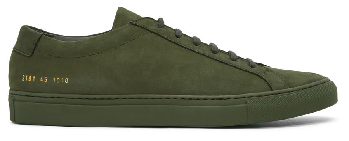

In [12]:
get_input_product('192133M237074')

In [13]:
def get_similar_product(sku_number, sim_matrix):
    
    index = product_df[product_df.sku == sku_number].index[0]
    
    
    print('OUTPUT:')
    
    count = 1
    for i in list(pd.Series(sim_matrix[index]).sort_values(ascending = True)[1:4].index):
    
        response = requests.get(product_df['image'][i])
        img = Image.open(BytesIO(response.content))
    
        print(f'PRODUCT {count}:')
        print(f"sku: {product_df['sku'][i]}")
        print(f"brand: {product_df['brand'][i]}")
        print(f"name: {product_df['name'][i]}")
        print(f"description: {product_df['description'][i]}")
        print(f"origin: {product_df['origin'][i]}")
        print(f"composition: {product_df['composition'][i]}")
        print(f"full price: {product_df['full-price'][i]}")
        print(f"sale price: {product_df['sale-price'][i]}")
        print(f"remaining sizes: {product_df['remaining-sizes'][i]}")
        
        plt.axis('off')
        plt.imshow(img)
        plt.show()
        
        count += 1

OUTPUT:
PRODUCT 1:
sku: 192133M237073
brand: Common Projects
name: SSENSE Exclusive Black Suede Achilles Sneakers
description: Low-top suede sneakers in black. Round toe. Tonal lace-up closure. Padded tongue. Signature series number stamp in gold-tone at outer side. Tonal treaded rubber sole. 

Available exclusively at SSENSE. 

Supplier color: Black
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 417
remaining sizes: ['39', '40', '41', '42', '43', '44', '45', '46', '47']


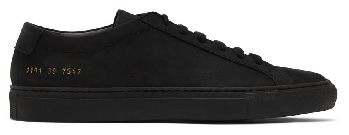

PRODUCT 2:
sku: 192133M237060
brand: Common Projects
name: Green Four Hole Low Sneakers
description: Low-top suede sneakers in green. Round toe. Lace-up closure in white. Pull-loop in white at heel collar and vamp. Series number stamp in gold-tone at outer side. Leather lining in off-white. Treaded rubber sole in black. Tonal hardware.

Supplier color: Green
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 600
sale price: 288
remaining sizes: ['39', '40', '41', '42', '43', '44', '45', '46']


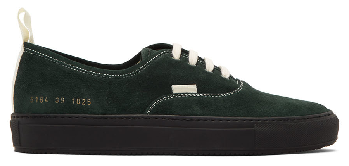

PRODUCT 3:
sku: 192133M237001
brand: Common Projects
name: White Achilles Low Sneakers
description: Lop-top buffed leather sneakers in white. Round toe. Tonal lace-up closure. Padded tongue. Signature series number stamp in gold-tone at outer side. Treaded rubber sole in off-white. 

Supplier color: White
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 485
sale price: 485
remaining sizes: ['38', '39', '40', '41', '42', '43', '44', '45', '46', '47']


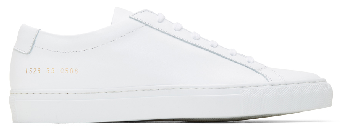

In [15]:
get_similar_product('192133M237074', cosine_dist)

In [16]:
def output_rec(sku_number, sim_matrix):
    
    get_input_product(sku_number)
    
    get_similar_product(sku_number, sim_matrix)

INPUT:
sku: 192128M213013
brand: Sunspel
name: White & Navy English Stripe T-Shirt
description: Short sleeve cotton jersey t-shirt striped in white and navy. Rib knit crewneck collar in navy. 

Supplier color: White /Navy
origin: United Kingdom
composition: 100% cotton.
full price: 135
sale price: 69
remaining sizes: ['XS', 'S', 'XL', 'XXL']


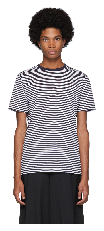

OUTPUT:
PRODUCT 1:
sku: 191128M213015
brand: Sunspel
name: White Classic T-Shirt
description: Short sleeve cotton jersey t-shirt in white. Rib knit crewneck collar. Tonal stitching.
origin: United Kingdom
composition: 100% cotton.
full price: 115
sale price: 61
remaining sizes: ['S', 'XXL']


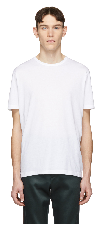

PRODUCT 2:
sku: 201128M213018
brand: Sunspel
name: White Cotton Classic T-Shirt
description: Short sleeve cotton jersey t-shirt in white. Crewneck collar. 

Supplier color: White
origin: United Kingdom
composition: 100% cotton.
full price: 100
sale price: 100
remaining sizes: ['XS', 'S', 'M', 'L', 'XL']


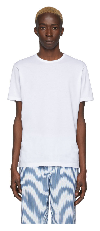

PRODUCT 3:
sku: 192191M213002
brand: Bianca Saunders
name: White Roll Up T-Shirt
description: Long sleeve heavyweight cotton jersey t-shirt in white. Rib knit crewneck collar. Hand-pleated detailing at hem. 

Supplier color: White
origin: United Kingdom
composition: 100% cotton.
full price: 300
sale price: 123
remaining sizes: ['XS', 'S']


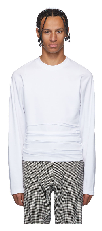

In [17]:
output_rec('192128M213013', cosine_dist)

INPUT:
sku: 201071M133119
brand: Dior Homme
name: Black Technicity06F Glasses
description: Rectangular acetate optical glasses in black. Hardware at face. Integrated nose pads. Logo engraved at bridge and metal hinges. Silver-tone hardware. Size: 55.17 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Black
origin: Italy
composition: Acetate, metal.
full price: 555
sale price: 555
remaining sizes: ['UNI']


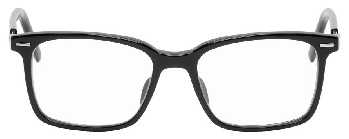

OUTPUT:
PRODUCT 1:
sku: 201071M133116
brand: Dior Homme
name: Black Diordisappear01 Glasses
description: Round optical glasses in matte black acetate and silver-tone metal. Hardware at face. Engraved logo at bridge. Transparent rubber nose pads. Cut-out at temple tips. Size: 49.22 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Matte black
origin: Italy
composition: Acetate, metal.
full price: 525
sale price: 525
remaining sizes: ['UNI']


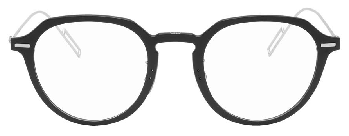

PRODUCT 2:
sku: 192071M133161
brand: Dior Homme
name: Black Dior216 Glasses
description: Round optical glasses in black acetate and silver-tone metal. Transparent rubber nose pads. Logo engraved at bridge and temples. Transparent acetate temple tips. Size: 47.23 150.

Leather case with tab-slot fastening included.

Supplier color: Black
origin: Italy
composition: Metal, acetate.
full price: 655
sale price: 314
remaining sizes: ['UNI']


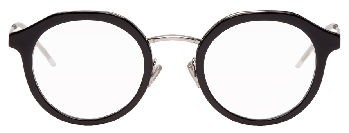

PRODUCT 3:
sku: 201071M133130
brand: Dior Homme
name: Black DiorComposit01 Glasses
description: Round metal-frame optical glasses matte black. Hardware detailing in silver-tone at face. Engraved silver-tone logo at double bridge and temples. Transparent rubber nose pads. Red trim at tonal acetate temple tips. Size: 54.19 150.

Logo-embossed leather case with magnetic fastening included.

Supplier color: Black/Palladium
origin: Italy
composition: Metal, acetate.
full price: 655
sale price: 655
remaining sizes: ['UNI']


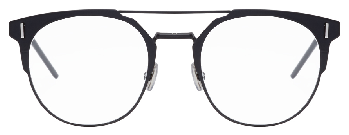

In [18]:
output_rec('201071M133119', cosine_dist)

INPUT:
sku: 182645M180001
brand: Gosha Rubchinskiy
name: Green Camo Hybrid Jacket
description: Long sleeve cotton and nylon-blend ripstop jacket featuring camouflage pattern in tones of green and brown. Spread collar. Button closure at front. Buttoned cinch tab and padding at shoulders. Flap pocket and welt pocket featuring black loop Velcro appliqué at chest. Flap pockets at waist. Three-button surgeon's cuffs. Central vent at back hem. Cupro lining in black. Tonal stitching.
origin: Imported
composition: Body: 70% cotton, 30% polyamide. Lining: 100% cupro.
full price: 1070
sale price: 385
remaining sizes: ['M', 'XL']


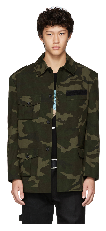

OUTPUT:
PRODUCT 1:
sku: 192048M178006
brand: Parajumpers
name: Black Down Rugged Marcus Jacket
description: Long sleeve down-filled nylon and cotton-blend canvas jacket in black. Brimmed hood featuring press-stud fastening and adjustable press-stud tabs. Yellow elasticized tab with press-stud fastening at throat. Concealed two-way zip closure with button placket at front. Zippered pocket and flap pockets at chest. Flap pockets at waist. Multicolor embroidered logo patch and zippered pocket at sleeve. Zippered vent at side-seams. Patch pockets and zippered pocket at interior. Quilted satin lining in green. Fully lined. Tonal hardware.

Supplier color: Black 

Fill: 90% duck down 10% duck feathers.
origin: Imported
composition: Body: 54% polyamide, 46% cotton. Lining: 100% polyamide.
full price: 895
sale price: 743
remaining sizes: ['XS', 'M', 'L', 'XL']


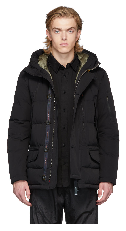

PRODUCT 2:
sku: 192539M178005
brand: Marcelo Burlon County of Milan
name: Purple Down Jacket
description: Long sleeve down-filled quilted hooded jacket in purple coated nylon satin and black nylon canvas. Zip closure at front. Zip pocket and rubberized logo appliqué at chest. Zippered pockets at waist. Bungee-style drawstring at hem. Adjustable Velcro straps at cuffs. Zippered pocket at interior. Satin lining in black. Black hardware. 

Fill: 70% down, 30% feathers. 

Supplier color: Dark Purple
origin: Imported
composition: Body 1: 100% polyamide. Body 2: 100% polyamide. Lining 1: 100% polyamide. Lining 2: 100% cotton. Trim: 100% polyamide.
full price: 1355
sale price: 745
remaining sizes: ['XL']


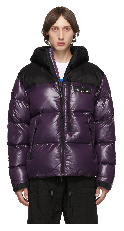

PRODUCT 3:
sku: 192048M178023
brand: Parajumpers
name: Navy Down Outstanding Berkeley Jacket
description: Long sleeve down-filled quilted Ventile Â® cotton Oxford cloth jacket in navy. Detachable brimmed hood. Elasticized tab in yellow with press-stud fastening at stand collar. Concealed two-way zip closure with press-stud placket at front. Flap pockets at waist. Embroidered multicolor logo patch at sleeve. Webbing pull-loop in navy and orange at shoulders and back. Adjustable tab with press-stud fastening at cuffs. Zippered expansion panel featuring mesh trim at side-seams. Bungee-style drawstring at hem. Zippered pockets at interior. Ripstop lining in green. Fully lined. Logo-engraved antiqued gunmetal-tone hardware. 

Supplier color: Blue/Black 

Fill: 90% down, 10% feathers.
origin: Imported
composition: Body: 100% cotton. Lining 1: 100% polyamide. Lining 2: 100% polyamide. Lining 3: 100% polyester.
full price: 1390
sale price: 1043
remaining sizes: ['XS', 'M', 'XL']


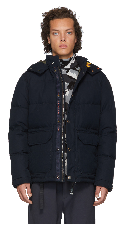

In [19]:
output_rec('182645M180001', cosine_dist)

## 2/ EUCLIDEAN DISTANCES

On the other hands, Euclidean distance is similar to using a ruler to actually measure the distance between two points. There are potentially unlimted points on a plane with the same distance to an anchor point while the angle of their vectors would be very different.

In [20]:
euc_dist = euclidean_distances(product_matrix)

In [17]:
print(euc_dist)

[[0.         2.83019351 2.45104339 ... 3.60730208 3.74367473 3.87549672]
 [2.83019351 0.         1.41531161 ... 3.8743309  4.00198677 3.87561946]
 [2.45104339 1.41531161 0.         ... 3.60669346 3.74348318 3.87533458]
 ...
 [3.60730208 3.8743309  3.60669346 ... 0.         3.31728898 3.46529587]
 [3.74367473 4.00198677 3.74348318 ... 3.31728898 0.         3.60582181]
 [3.87549672 3.87561946 3.87533458 ... 3.46529587 3.60582181 0.        ]]


INPUT:
sku: 201071M133119
brand: Dior Homme
name: Black Technicity06F Glasses
description: Rectangular acetate optical glasses in black. Hardware at face. Integrated nose pads. Logo engraved at bridge and metal hinges. Silver-tone hardware. Size: 55.17 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Black
origin: Italy
composition: Acetate, metal.
full price: 555
sale price: 555
remaining sizes: ['UNI']


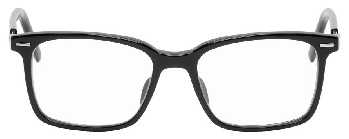

OUTPUT:
PRODUCT 1:
sku: 201071M133116
brand: Dior Homme
name: Black Diordisappear01 Glasses
description: Round optical glasses in matte black acetate and silver-tone metal. Hardware at face. Engraved logo at bridge. Transparent rubber nose pads. Cut-out at temple tips. Size: 49.22 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Matte black
origin: Italy
composition: Acetate, metal.
full price: 525
sale price: 525
remaining sizes: ['UNI']


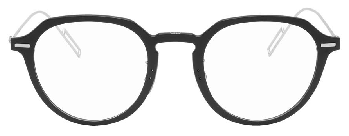

PRODUCT 2:
sku: 192071M133161
brand: Dior Homme
name: Black Dior216 Glasses
description: Round optical glasses in black acetate and silver-tone metal. Transparent rubber nose pads. Logo engraved at bridge and temples. Transparent acetate temple tips. Size: 47.23 150.

Leather case with tab-slot fastening included.

Supplier color: Black
origin: Italy
composition: Metal, acetate.
full price: 655
sale price: 314
remaining sizes: ['UNI']


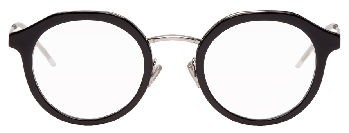

PRODUCT 3:
sku: 201071M133115
brand: Dior Homme
name: Transparent Diordisappear01 Glasses
description: Round optical glasses in transparent acetate and silver-tone metal. Hardware at face. Engraved logo at bridge. Transparent rubber nose pads. Cut-out at temple tips. Size: 49.22 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Crystal
origin: Italy
composition: Acetate, metal.
full price: 525
sale price: 525
remaining sizes: ['UNI']


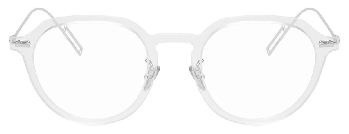

In [21]:
output_rec('201071M133119', euc_dist)

INPUT:
sku: 192128M213013
brand: Sunspel
name: White & Navy English Stripe T-Shirt
description: Short sleeve cotton jersey t-shirt striped in white and navy. Rib knit crewneck collar in navy. 

Supplier color: White /Navy
origin: United Kingdom
composition: 100% cotton.
full price: 135
sale price: 69
remaining sizes: ['XS', 'S', 'XL', 'XXL']


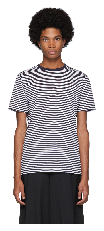

OUTPUT:
PRODUCT 1:
sku: 191128M213015
brand: Sunspel
name: White Classic T-Shirt
description: Short sleeve cotton jersey t-shirt in white. Rib knit crewneck collar. Tonal stitching.
origin: United Kingdom
composition: 100% cotton.
full price: 115
sale price: 61
remaining sizes: ['S', 'XXL']


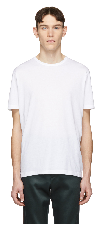

PRODUCT 2:
sku: 201128M213018
brand: Sunspel
name: White Cotton Classic T-Shirt
description: Short sleeve cotton jersey t-shirt in white. Crewneck collar. 

Supplier color: White
origin: United Kingdom
composition: 100% cotton.
full price: 100
sale price: 100
remaining sizes: ['XS', 'S', 'M', 'L', 'XL']


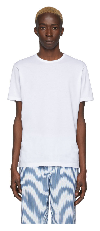

PRODUCT 3:
sku: 192191M213002
brand: Bianca Saunders
name: White Roll Up T-Shirt
description: Long sleeve heavyweight cotton jersey t-shirt in white. Rib knit crewneck collar. Hand-pleated detailing at hem. 

Supplier color: White
origin: United Kingdom
composition: 100% cotton.
full price: 300
sale price: 123
remaining sizes: ['XS', 'S']


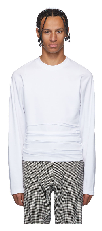

In [22]:
output_rec('192128M213013', euc_dist)

INPUT:
sku: 192133M237074
brand: Common Projects
name: SSENSE Exclusive Green Suede Achilles Sneakers
description: Lop-top suede sneakers in green. Round toe. Tonal lace-up closure. Padded tongue and collar. Signature series number stamped in gold-tone at sides. Tonal treaded rubber sole.

Available exclusively at SSENSE.

Supplier color: Olive
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 345
remaining sizes: ['39', '40', '41', '42', '43', '44', '46', '47']


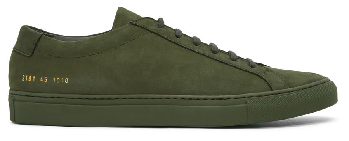

OUTPUT:
PRODUCT 1:
sku: 192133M237073
brand: Common Projects
name: SSENSE Exclusive Black Suede Achilles Sneakers
description: Low-top suede sneakers in black. Round toe. Tonal lace-up closure. Padded tongue. Signature series number stamp in gold-tone at outer side. Tonal treaded rubber sole. 

Available exclusively at SSENSE. 

Supplier color: Black
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 417
remaining sizes: ['39', '40', '41', '42', '43', '44', '45', '46', '47']


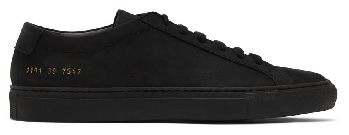

PRODUCT 2:
sku: 192133M237007
brand: Common Projects
name: Green Original Achilles Low Sneakers
description: Low-top buffed leather sneakers in green. Round toe. Tonal lace-up closure. Padded tongue and collar. Series number stamp in gold-tone at outer side. Tonal rubber sole.

Supplier color: Green
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 399
remaining sizes: ['39', '40', '41', '42', '43', '45']


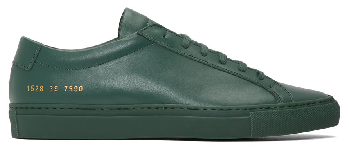

PRODUCT 3:
sku: 192133M237060
brand: Common Projects
name: Green Four Hole Low Sneakers
description: Low-top suede sneakers in green. Round toe. Lace-up closure in white. Pull-loop in white at heel collar and vamp. Series number stamp in gold-tone at outer side. Leather lining in off-white. Treaded rubber sole in black. Tonal hardware.

Supplier color: Green
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 600
sale price: 288
remaining sizes: ['39', '40', '41', '42', '43', '44', '45', '46']


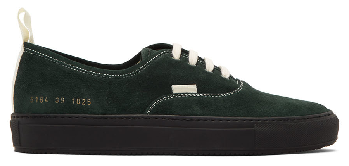

In [23]:
output_rec('192133M237074', euc_dist)

INPUT:
sku: 182645M180001
brand: Gosha Rubchinskiy
name: Green Camo Hybrid Jacket
description: Long sleeve cotton and nylon-blend ripstop jacket featuring camouflage pattern in tones of green and brown. Spread collar. Button closure at front. Buttoned cinch tab and padding at shoulders. Flap pocket and welt pocket featuring black loop Velcro appliqué at chest. Flap pockets at waist. Three-button surgeon's cuffs. Central vent at back hem. Cupro lining in black. Tonal stitching.
origin: Imported
composition: Body: 70% cotton, 30% polyamide. Lining: 100% cupro.
full price: 1070
sale price: 385
remaining sizes: ['M', 'XL']


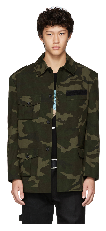

OUTPUT:
PRODUCT 1:
sku: 192539M178005
brand: Marcelo Burlon County of Milan
name: Purple Down Jacket
description: Long sleeve down-filled quilted hooded jacket in purple coated nylon satin and black nylon canvas. Zip closure at front. Zip pocket and rubberized logo appliqué at chest. Zippered pockets at waist. Bungee-style drawstring at hem. Adjustable Velcro straps at cuffs. Zippered pocket at interior. Satin lining in black. Black hardware. 

Fill: 70% down, 30% feathers. 

Supplier color: Dark Purple
origin: Imported
composition: Body 1: 100% polyamide. Body 2: 100% polyamide. Lining 1: 100% polyamide. Lining 2: 100% cotton. Trim: 100% polyamide.
full price: 1355
sale price: 745
remaining sizes: ['XL']


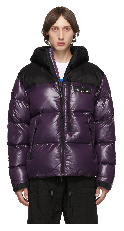

PRODUCT 2:
sku: 191358M180004
brand: Dries Van Noten
name: Black Vignola Jacket
description: Long sleeve cotton canvas jacket in black. Spread collar. Concealed button closure at front. Flap pockets at chest. Welt pockets at waist. Pleats at hem. Single-button barrel cuffs. Patch pocket at interior. Unlined.
origin: Imported
composition: 100% cotton.
full price: 750
sale price: 443
remaining sizes: ['M']


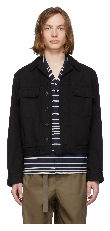

PRODUCT 3:
sku: 191184M177002
brand: Sankuanz
name: Black Denim Stonewashed Jacket
description: Long sleeve non-stretch denim jacket in black. Fading throughout. Spread collar. Button closure at front. Buttoned flap pockets at chest. Welt pockets at waist. Adjustable buttoned tab at back hem. Tonal logo embroidered at back. Single-button barrel cuffs. Green and gunmetal-tone hardware.
origin: Imported
composition: 100% cotton.
full price: 920
sale price: 322
remaining sizes: ['M']


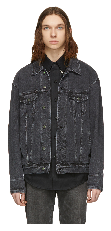

In [24]:
output_rec('182645M180001', euc_dist)

## 3/ COMBINED SOLUTION

Since Consine Similarity looks at the angles of 2 vectors while Euclidean Distance looks at the actual distance between 2 points. Therefore, I believe combining these 2 methods will yield better recommndations.

In [31]:
def get_similar_product_combined(sku_number, sim_matrix, sim_matrix_2):
    
    index = product_df[product_df.sku == sku_number].index[0]
    
    
    print('OUTPUT:')
    
    count = 1
    
    dist_1 = pd.Series(sim_matrix[index]).sort_values(ascending = True)[0:30] #take top 30 first
    
    dist_2 = pd.Series(sim_matrix_2[index]).sort_values(ascending = True)[0:30] #take top 30 first
    
    combined_score = dist_1*dist_2
    
    for i in list(combined_score.sort_values(ascending = True)[1:4].index): #get final top 3
    
        response = requests.get(product_df['image'][i])
        img = Image.open(BytesIO(response.content))
    
        print(f'PRODUCT {count}:')
        print(f"sku: {product_df['sku'][i]}")
        print(f"brand: {product_df['brand'][i]}")
        print(f"name: {product_df['name'][i]}")
        print(f"description: {product_df['description'][i]}")
        print(f"origin: {product_df['origin'][i]}")
        print(f"composition: {product_df['composition'][i]}")
        print(f"full price: {product_df['full-price'][i]}")
        print(f"sale price: {product_df['sale-price'][i]}")
        print(f"remaining sizes: {product_df['remaining-sizes'][i]}")
        
        plt.axis('off')
        plt.imshow(img)
        plt.show()
        
        count += 1

In [32]:
def output_rec_combined(sku_number, sim_matrix, sim_matrix_2):
    
    get_input_product(sku_number)
    
    get_similar_product_combined(sku_number, sim_matrix, sim_matrix_2)

INPUT:
sku: 192133M237074
brand: Common Projects
name: SSENSE Exclusive Green Suede Achilles Sneakers
description: Lop-top suede sneakers in green. Round toe. Tonal lace-up closure. Padded tongue and collar. Signature series number stamped in gold-tone at sides. Tonal treaded rubber sole.

Available exclusively at SSENSE.

Supplier color: Olive
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 345
remaining sizes: ['39', '40', '41', '42', '43', '44', '46', '47']


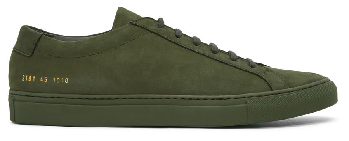

OUTPUT:
PRODUCT 1:
sku: 192133M237073
brand: Common Projects
name: SSENSE Exclusive Black Suede Achilles Sneakers
description: Low-top suede sneakers in black. Round toe. Tonal lace-up closure. Padded tongue. Signature series number stamp in gold-tone at outer side. Tonal treaded rubber sole. 

Available exclusively at SSENSE. 

Supplier color: Black
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 417
remaining sizes: ['39', '40', '41', '42', '43', '44', '45', '46', '47']


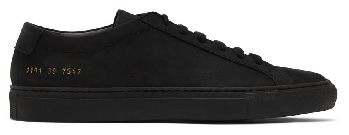

PRODUCT 2:
sku: 192133M237060
brand: Common Projects
name: Green Four Hole Low Sneakers
description: Low-top suede sneakers in green. Round toe. Lace-up closure in white. Pull-loop in white at heel collar and vamp. Series number stamp in gold-tone at outer side. Leather lining in off-white. Treaded rubber sole in black. Tonal hardware.

Supplier color: Green
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 600
sale price: 288
remaining sizes: ['39', '40', '41', '42', '43', '44', '45', '46']


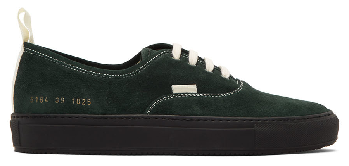

PRODUCT 3:
sku: 192133M237001
brand: Common Projects
name: White Achilles Low Sneakers
description: Lop-top buffed leather sneakers in white. Round toe. Tonal lace-up closure. Padded tongue. Signature series number stamp in gold-tone at outer side. Treaded rubber sole in off-white. 

Supplier color: White
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 485
sale price: 485
remaining sizes: ['38', '39', '40', '41', '42', '43', '44', '45', '46', '47']


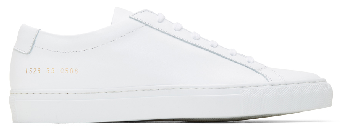

In [33]:
output_rec_combined('192133M237074',cosine_dist, euc_dist)

INPUT:
sku: 201071M133119
brand: Dior Homme
name: Black Technicity06F Glasses
description: Rectangular acetate optical glasses in black. Hardware at face. Integrated nose pads. Logo engraved at bridge and metal hinges. Silver-tone hardware. Size: 55.17 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Black
origin: Italy
composition: Acetate, metal.
full price: 555
sale price: 555
remaining sizes: ['UNI']


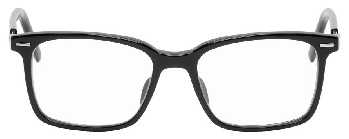

OUTPUT:
PRODUCT 1:
sku: 201071M133116
brand: Dior Homme
name: Black Diordisappear01 Glasses
description: Round optical glasses in matte black acetate and silver-tone metal. Hardware at face. Engraved logo at bridge. Transparent rubber nose pads. Cut-out at temple tips. Size: 49.22 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Matte black
origin: Italy
composition: Acetate, metal.
full price: 525
sale price: 525
remaining sizes: ['UNI']


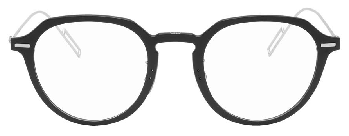

PRODUCT 2:
sku: 192071M133161
brand: Dior Homme
name: Black Dior216 Glasses
description: Round optical glasses in black acetate and silver-tone metal. Transparent rubber nose pads. Logo engraved at bridge and temples. Transparent acetate temple tips. Size: 47.23 150.

Leather case with tab-slot fastening included.

Supplier color: Black
origin: Italy
composition: Metal, acetate.
full price: 655
sale price: 314
remaining sizes: ['UNI']


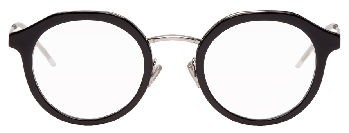

PRODUCT 3:
sku: 201071M133130
brand: Dior Homme
name: Black DiorComposit01 Glasses
description: Round metal-frame optical glasses matte black. Hardware detailing in silver-tone at face. Engraved silver-tone logo at double bridge and temples. Transparent rubber nose pads. Red trim at tonal acetate temple tips. Size: 54.19 150.

Logo-embossed leather case with magnetic fastening included.

Supplier color: Black/Palladium
origin: Italy
composition: Metal, acetate.
full price: 655
sale price: 655
remaining sizes: ['UNI']


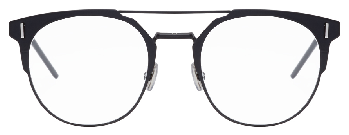

In [35]:
output_rec_combined('201071M133119', cosine_dist, euc_dist)

INPUT:
sku: 182645M180001
brand: Gosha Rubchinskiy
name: Green Camo Hybrid Jacket
description: Long sleeve cotton and nylon-blend ripstop jacket featuring camouflage pattern in tones of green and brown. Spread collar. Button closure at front. Buttoned cinch tab and padding at shoulders. Flap pocket and welt pocket featuring black loop Velcro appliqué at chest. Flap pockets at waist. Three-button surgeon's cuffs. Central vent at back hem. Cupro lining in black. Tonal stitching.
origin: Imported
composition: Body: 70% cotton, 30% polyamide. Lining: 100% cupro.
full price: 1070
sale price: 385
remaining sizes: ['M', 'XL']


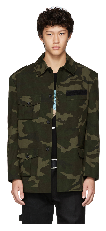

OUTPUT:
PRODUCT 1:
sku: 192539M178005
brand: Marcelo Burlon County of Milan
name: Purple Down Jacket
description: Long sleeve down-filled quilted hooded jacket in purple coated nylon satin and black nylon canvas. Zip closure at front. Zip pocket and rubberized logo appliqué at chest. Zippered pockets at waist. Bungee-style drawstring at hem. Adjustable Velcro straps at cuffs. Zippered pocket at interior. Satin lining in black. Black hardware. 

Fill: 70% down, 30% feathers. 

Supplier color: Dark Purple
origin: Imported
composition: Body 1: 100% polyamide. Body 2: 100% polyamide. Lining 1: 100% polyamide. Lining 2: 100% cotton. Trim: 100% polyamide.
full price: 1355
sale price: 745
remaining sizes: ['XL']


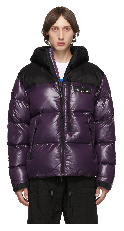

PRODUCT 2:
sku: 192048M178006
brand: Parajumpers
name: Black Down Rugged Marcus Jacket
description: Long sleeve down-filled nylon and cotton-blend canvas jacket in black. Brimmed hood featuring press-stud fastening and adjustable press-stud tabs. Yellow elasticized tab with press-stud fastening at throat. Concealed two-way zip closure with button placket at front. Zippered pocket and flap pockets at chest. Flap pockets at waist. Multicolor embroidered logo patch and zippered pocket at sleeve. Zippered vent at side-seams. Patch pockets and zippered pocket at interior. Quilted satin lining in green. Fully lined. Tonal hardware.

Supplier color: Black 

Fill: 90% duck down 10% duck feathers.
origin: Imported
composition: Body: 54% polyamide, 46% cotton. Lining: 100% polyamide.
full price: 895
sale price: 743
remaining sizes: ['XS', 'M', 'L', 'XL']


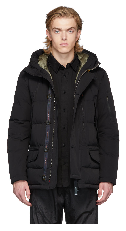

PRODUCT 3:
sku: 192048M178009
brand: Parajumpers
name: Black Down Skyline Shedir Jacket
description: Long sleeve down-filled quilted taffeta jacket in black. Webbing press-stud tab, bungee-style drawstring, and cinch fastening at hood. Concealed two-way zip closure with press-stud placket. Zippered pockets at chest and waist. Webbing trim in black and orange at shoulders. Multicolor logo patch at sleeve. Velcro tab at elasticized cuffs. Bungee-style drawstrings at hem. Patch pocket and zippered pocket at interior. Satin lining in green. Gunmetal-tone hardware. 

Supplier color: Black 

Fill: 90% down, 10% feather.
origin: Imported
composition: Body: 100% polyester. Trim: 52% polyamide, 48% cotton.
full price: 1130
sale price: 994
remaining sizes: ['XS', 'XL']


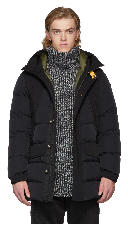

In [36]:
output_rec_combined('182645M180001', cosine_dist, euc_dist)

## SCENARIO 2: A product from another site but user prefers to buy from SSENSE

In [37]:
import re
import gensim
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

We will perform the following steps:

- Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
- Words that have fewer than 2 characters are removed.
- All stopwords are removed.
- Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are stemmed — words are reduced to their root form.

In [38]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    text= re.sub("(\r|\n|-|&|approx|supplier|length|height)+"," ",text,flags=re.IGNORECASE) 
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
    return " ".join(result)

In [39]:
from sklearn.externals import joblib

# load the models to disk

feature_dir = "C:/Users/tring/Desktop/SSENSE Project/feature engineering/"

category_mlb = joblib.load(feature_dir +'category_binarizer.sav')

brand_mlb = joblib.load(feature_dir +'brand_binarizer.sav')
tfidf_vectorizer_model = joblib.load(feature_dir+'tfidf_vectorizer.sav')
nmf_model = joblib.load(feature_dir+'nmf_model.sav')
color_mlb = joblib.load(feature_dir+'color_binarizer.sav')
origin_mlb = joblib.load(feature_dir+'origin_binarizer.sav')
composition_mlb = joblib.load(feature_dir+'composition_binarizer.sav')
size_mlb = joblib.load(feature_dir+'size_binarizer.sav')
price_scaler = joblib.load(feature_dir+'price_scaler.sav')

#### Sample Product 1: https://www.mrporter.com/en-us/mens/product/reigning-champ/hoodies/loopback-cotton-jersey-zip-up-hoodie/1473020371458261

In [42]:
category_input = "hoodies"

In [33]:
processed_category = pd.Series(category_input).map(preprocess).str.split(" ")

In [34]:
category_matrix = category_mlb.transform(processed_category)
print(category_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]]


In [40]:
def process_category(text):
    processed_category = pd.Series(text).map(preprocess).str.split(" ")
    return category_mlb.transform(processed_category)

In [43]:
process_category(category_input)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [45]:
brand_input = "Reigning Champ"

In [36]:
processed_brand = pd.Series(brand_input).str.lower().str.split(",")

In [37]:
processed_brand

0    [reigning champ]
dtype: object

In [38]:
brand_matrix = brand_mlb.transform(processed_brand)
print(brand_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]]


C:\Users\tring\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:935: UserWarning: unknown class(es) ['reigning champ'] will be ignored
  .format(sorted(unknown, key=str)))


In [44]:
def process_brand(text):
    processed_brand = pd.Series(text).str.lower().str.split(",")
    return brand_mlb.transform(processed_brand)

In [46]:
process_brand(brand_input)

C:\Users\tring\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:935: UserWarning: unknown class(es) ['reigning champ'] will be ignored
  .format(sorted(unknown, key=str)))


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [47]:
name_input = "Loopback Cotton-Jersey Zip-Up Hoodie"

description_input = '''
Whether you're a bit of a collector or new to the look, 
Reigning Champ offers a range of hoodies that are stylish, 
comfortable and well-crafted, like this zip-up style. It is 
made from cosy loopback cotton-jersey and finished with 
bartack stitches to reinforce areas prone to wear. It's 
ideally suited to days spent at home channel-surfing or when 
it's your turn to head out for coffee and the weekend papers

Black loopback cotton-jersey
Drawstring hood, raglan sleeves, front pouch pockets, designer emblem, 
ribbed side panels and trims, flatlock seams
Two-way zip fastening
'''

In [40]:
processed_detail = pd.Series(preprocess(name_input+description_input))
processed_detail

0    loopback cotton jersey zip hoodi bite collecto...
dtype: object

In [41]:
nmf_matrix = nmf_model.transform(tfidf_vectorizer_model.transform(processed_detail))

print(nmf_matrix)

[[0.01017334 0.00665769 0.         0.         0.00607759 0.01673806
  0.         0.         0.         0.         0.         0.
  0.         0.         0.0003497  0.         0.         0.
  0.         0.00238591 0.         0.         0.         0.
  0.00214028 0.         0.00055094 0.00181619 0.         0.
  0.         0.         0.         0.         0.00369006 0.
  0.         0.         0.         0.         0.         0.
  0.00041534 0.00038506 0.00644366 0.         0.         0.00538473
  0.         0.        ]]


In [49]:
def process_detail(name_text, description_text):
    processed_detail = pd.Series(preprocess(name_text+description_text))
    return nmf_model.transform(tfidf_vectorizer_model.transform(processed_detail))

In [50]:
process_detail(name_input,description_input)

array([[0.01017334, 0.00665769, 0.        , 0.        , 0.00607759,
        0.01673806, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0003497 ,
        0.        , 0.        , 0.        , 0.        , 0.00238591,
        0.        , 0.        , 0.        , 0.        , 0.00214028,
        0.        , 0.00055094, 0.00181619, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00369006,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00041534, 0.00038506, 0.00644366,
        0.        , 0.        , 0.00538473, 0.        , 0.        ]])

In [94]:
color_input = "Black, White"

In [43]:
processed_color = pd.Series(color_input.replace(" ", "").lower()).str.split(",")

color_matrix = color_mlb.transform(processed_color)

print(color_matrix)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [53]:
def process_color(text):
    processed_color = pd.Series(text.replace(" ", "").lower()).str.split(",")
    return color_mlb.transform(processed_color)

In [95]:
process_color(color_input)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [56]:
origin_input = "Canada"

In [45]:
process_origin = pd.Series(origin_input.lower()).str.split(",")

origin_matrix = origin_mlb.transform(process_origin)

print(origin_matrix)

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [55]:
def process_origin(text):
    process_origin = pd.Series(text.lower()).str.split(",")
    return origin_mlb.transform(process_origin)

In [57]:
process_origin(origin_input)

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [60]:
def preprocess_composition(text):
    text= re.sub("(Upper|Sole|Body|Trim|Lining|Fill|American)"," ",text,flags=re.IGNORECASE) 
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
    return " ".join(result)

In [59]:
composition_input = "100% cotton, metal"

In [48]:
processed_composition = pd.Series(process_composition(composition_input)).str.split()

composition_matrix = composition_mlb.transform(processed_composition)

print(composition_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]


In [63]:
def process_composition(text):
    processed_composition = pd.Series(preprocess_composition(text)).str.split()
    return composition_mlb.transform(processed_composition)

In [64]:
process_composition(composition_input)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [86]:
size_input = 'S, M'

In [90]:
processed_sizes = pd.Series(size_input.replace(" ", "").upper()).str.split(",")

size_matrix = size_mlb.transform(processed_sizes)

print(size_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [87]:
def process_size(size_text):
    processed_sizes = pd.Series(size_text.replace(" ", "").upper()).str.split(",")
    return size_mlb.transform(processed_sizes)

In [88]:
process_size(size_input)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [81]:
full_price_input = 155
sale_price_input = 155

In [52]:
processed_prices = np.array([[full_price_input,sale_price_input]]).astype(float)

price_matrix = price_scaler.transform(processed_prices)

print(price_matrix)

[[0.01028821 0.01028821]]


In [82]:
def process_prices(full_price, sale_price):
    processed_prices = np.array([[full_price,sale_price]]).astype(float)
    return price_scaler.transform(processed_prices)

In [83]:
process_prices(full_price_input, sale_price_input)

array([[0.01028821, 0.01028821]])

In [53]:
combined_matrix = np.concatenate((category_matrix, brand_matrix, nmf_matrix, color_matrix, origin_matrix,
              composition_matrix, size_matrix,
              price_matrix),axis = 1)

print(combined_matrix)

[[0.         0.         0.         ... 0.         0.01028821 0.01028821]]


In [99]:
def combine_matrices(category_text, brand_text,name_text,description_text,
                     color_text, origin_text, composition_text, size_text, full_price, sale_price):
    
    category_matrix = process_category(category_text)
    brand_matrix = process_brand(brand_text)
    nmf_matrix = process_detail(name_text, description_text)
    color_matrix = process_color(color_text)
    origin_matrix = process_origin(origin_text)
    composition_matrix = process_composition(composition_text)
    size_matrix = process_size(size_text)
    price_matrix = process_prices(full_price, sale_price)
    
    return np.concatenate((category_matrix, brand_matrix, nmf_matrix, color_matrix, origin_matrix,
              composition_matrix, size_matrix,
              price_matrix),axis = 1)

In [100]:
combine_matrices(category_input, brand_input,name_input,description_input,
                     color_input, origin_input, composition_input, size_input, full_price_input, sale_price_input)

C:\Users\tring\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:935: UserWarning: unknown class(es) ['reigning champ'] will be ignored
  .format(sorted(unknown, key=str)))


array([[0.        , 0.        , 0.        , ..., 0.        , 0.01028821,
        0.01028821]])

In [109]:
new_product_array = combine_matrices(category_input, brand_input,name_input,description_input,
                     color_input, origin_input, composition_input, size_input, full_price_input, sale_price_input)

new_product_array

C:\Users\tring\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:935: UserWarning: unknown class(es) ['reigning champ'] will be ignored
  .format(sorted(unknown, key=str)))


array([[0.        , 0.        , 0.        , ..., 0.        , 0.01028821,
        0.01028821]])

In [107]:
cosine_dist2 = cosine_distances(new_product_array, product_matrix)

print(cosine_dist2)

[[0.8557247  0.99997539 0.8556954  ... 0.88210863 0.88810714 0.89329951]]


In [140]:
euc_dist2 = euclidean_distances(new_product_array, product_matrix)

print(euc_dist2)

[[3.46560184 3.74257182 3.46477152 ... 3.8735624  4.00133327 4.12481821]]


In [123]:
def get_distances(new_product_array, product_matrix):
    
    return cosine_distances(new_product_array, product_matrix), euclidean_distances(new_product_array, product_matrix)

In [146]:
def get_sim_products_for_new(category_text, brand_text,name_text,description_text,
                     color_text, origin_text, composition_text, size_text, full_price, sale_price): #for outside products
    
    new_product_array = combine_matrices(category_text, brand_text,name_text,description_text,
                     color_text, origin_text, composition_text, size_text, full_price, sale_price)
    
    cosine_dist, euc_dist = get_distances(new_product_array, product_matrix)
    
    combined_dist = cosine_dist*euc_dist
    
    print('OUTPUT:')
    
    count = 1
            
    for i in list(np.argsort(combined_dist)[0])[:3]: #get final top 3
    
        response = requests.get(product_df['image'][i])
        img = Image.open(BytesIO(response.content))
    
        print(f'PRODUCT {count}:')
        print(f"sku: {product_df['sku'][i]}")
        print(f"brand: {product_df['brand'][i]}")
        print(f"name: {product_df['name'][i]}")
        print(f"description: {product_df['description'][i]}")
        print(f"origin: {product_df['origin'][i]}")
        print(f"composition: {product_df['composition'][i]}")
        print(f"full price: {product_df['full-price'][i]}")
        print(f"sale price: {product_df['sale-price'][i]}")
        print(f"remaining sizes: {product_df['remaining-sizes'][i]}")
        
        plt.axis('off')
        plt.imshow(img)
        plt.show()
        
        count += 1

C:\Users\tring\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:935: UserWarning: unknown class(es) ['reigning champ'] will be ignored
  .format(sorted(unknown, key=str)))


OUTPUT:
PRODUCT 1:
sku: 192895M213007
brand: Aimé Leon Dore
name: Black Flocked T-Shirt
description: Short sleeve 12 oz. cotton jersey t-shirt black. Rib knit crewneck collar. Logo flocked in white at chest. Textile logo flag at side-seam.

Supplier color: Black
origin: Canada
composition: 100% cotton.
full price: 130
sale price: 130
remaining sizes: ['XS', 'S', 'M']


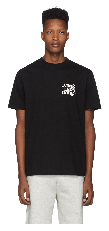

PRODUCT 2:
sku: 192471M202003
brand: Stella McCartney
name: Black Igor Hoodie
description: Long sleeve French terry hoodie in black. Drawstring at hoodie. Logo embroidered in white at chest. Rib knit cuffs and hem. Kangaroo pocket at waist. 

Made from cruelty-free materials. 

Supplier color: Black
origin: Italy
composition: 100% cotton.
full price: 795
sale price: 469
remaining sizes: ['S', 'M']


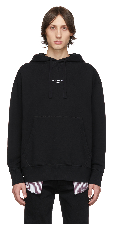

PRODUCT 3:
sku: 192889M202004
brand: Enfants Riches Déprimés
name: Black Logo Hoodie
description: Long sleeve cotton fleece hoodie in black. Embroidered logo in white at chest. Kangaroo pocket at waist. Elasticized cuffs and hem. 

Supplier color: Black
origin: United States
composition: 100% cotton.
full price: 1150
sale price: 656
remaining sizes: ['S', 'M']


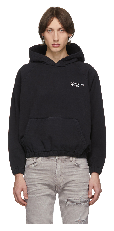

In [142]:
get_sim_products_for_new(category_input, brand_input,name_input,description_input,
                     color_input, origin_input, composition_input, size_input, full_price_input, sale_price_input)

#### Sample Product 2: https://www.farfetch.com/ca/shopping/men/golden-goose-starter-low-top-sneakers-item-14375526.aspx?storeid=9904

In [144]:
category_input2 = 'sneakers'

brand_input2 = 'Golden Goose'

name_input2 = 'Starter low-top sneakers'

description_input2 = '''
Trying to set a new personal record in competitive athleisure? 
Crafted from calf leather, these white Starter low-top sneakers 
from Golden Goose will get you a spot at the podium in no time. 
Ready? Set. Go! Featuring a round top, a lace-up front fastening,
a contrasting heel counter, a brand embossed tongue, a pull tab at
the rear, eyelets and a signature star patch detail to the side.
'''

color_input2 = 'white, silver'

origin_input2 = 'Italy'

composition_input2 = '''Outer: Calf Leather 100%
Lining: Cotton 100%, Leather 100%
Sole: Rubber 100%'''

size_input2 = '41, 42'

full_price_input2 = 770
 
sale_price_input2 = 616

C:\Users\tring\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:935: UserWarning: unknown class(es) ['calf', 'outer'] will be ignored
  .format(sorted(unknown, key=str)))


OUTPUT:
PRODUCT 1:
sku: 192264M236004
brand: Golden Goose
name: White Slide Sneakers
description: High-top panelled buffed leather and suede sneakers in white and grey. Smudging and distressing throughout. Lace-up closure in grey. Logo flag at tongue. Gold-tone logo stamp, stripe appliqué, and signature star appliqué at outer side. Zip closure at inner side. Suede trim in grey at heel counter. Tonal treaded rubber sole. Silver-tone hardware. 

Supplier color: White leather
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 720
sale price: 547
remaining sizes: ['42']


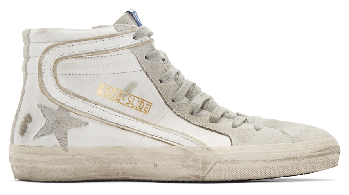

PRODUCT 2:
sku: 192264M237045
brand: Golden Goose
name: White & Silver Ball Star Sneakers
description: Handcrafted low-top buffed leather sneakers in white and metallic silver-tone. Distressing, smudging, and perforated detailing throughout. Round toe. Lace-up closure in grey. Textile logo appliqué at white padded ripstop tongue. Padded collar. Signature star appliqué  in black at outer side. Heel tab in black. Logo graphic embossed in black at heel counter. Rubber midsole in off-white. Treaded rubber outsole in black.

Supplier color: White/Silver/Black
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 640
sale price: 403
remaining sizes: ['41', '42', '44', '47']


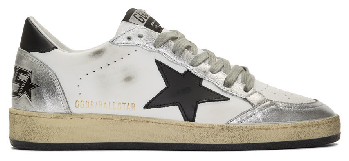

PRODUCT 3:
sku: 192264M237065
brand: Golden Goose
name: White Stardan Star Sneakers
description: Handcrafted low-top buffed leather sneakers in white. Smudging and distressing throughout. Perforated detailing at round toe. Tonal lace-up closure. Textile logo flag at padded tongue. Padded collar. Logo graphic printed in black at heel collar. Perforated detailing at inner side. Gold-tone logo stamp and tonal signature graphic appliqué  at outer side. Tonal textured rubber midsole featuring embossed logo at inner side. Tonal treaded rubber outsole. 

Supplier color: White
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 740
sale price: 400
remaining sizes: ['41', '42', '46']


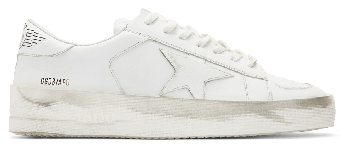

In [147]:
get_sim_products_for_new(category_input2, brand_input2,name_input2,description_input2,
                     color_input2, origin_input2, composition_input2, size_input2, full_price_input2, sale_price_input2)